In [77]:
import numpy as np 
import pandas as pd
import os


# Preparando os dados

In [78]:
from pathlib import Path
image_dir = Path('Braille Dataset')  

In [79]:
dir_list = list(image_dir.glob('*.jpg'))
print(dir_list[0])

Braille Dataset\a1.JPG0dim.jpg


In [80]:
image_count = len(dir_list)
image_count

1560

In [81]:
name_list = []
for i in dir_list:
    name_list.append(os.path.basename(i)[0])

In [82]:
import cv2
images = []
for dir in dir_list:
    I = cv2.imread(str(dir))
    images.append(I)

In [83]:
images_list = np.array(images)
name_list = np.array(name_list).T 

In [84]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
name_list = le.fit_transform(name_list)

images_list = images_list / 255.0 
print(images_list[0])

[[[0.76078431 0.76078431 0.76078431]
  [0.8        0.8        0.8       ]
  [0.80784314 0.80784314 0.80784314]
  ...
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]]

 [[0.75686275 0.75686275 0.75686275]
  [0.69411765 0.69411765 0.69411765]
  [0.7372549  0.7372549  0.7372549 ]
  ...
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]]

 [[0.78039216 0.78039216 0.78039216]
  [0.79607843 0.79607843 0.79607843]
  [0.76470588 0.76470588 0.76470588]
  ...
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]]

 ...

 [[0.76862745 0.76862745 0.76862745]
  [0.77254902 0.77254902 0.77254902]
  [0.76470588 0.76470588 0.76470588]
  ...
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]]

 [[0.77254902 0.77254902 0.77254902]
  [0.77647059 0.77647059 0.77647059]


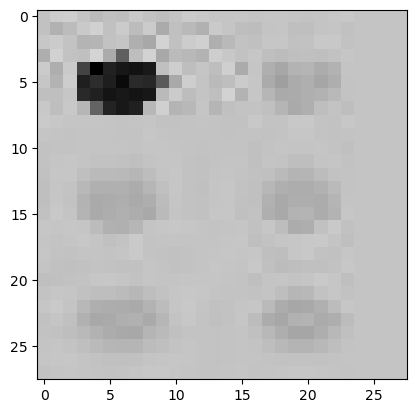

In [85]:
import matplotlib.pyplot as plt

plt.imshow(images_list[0])

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(images_list, name_list, test_size=0.2, random_state=42)

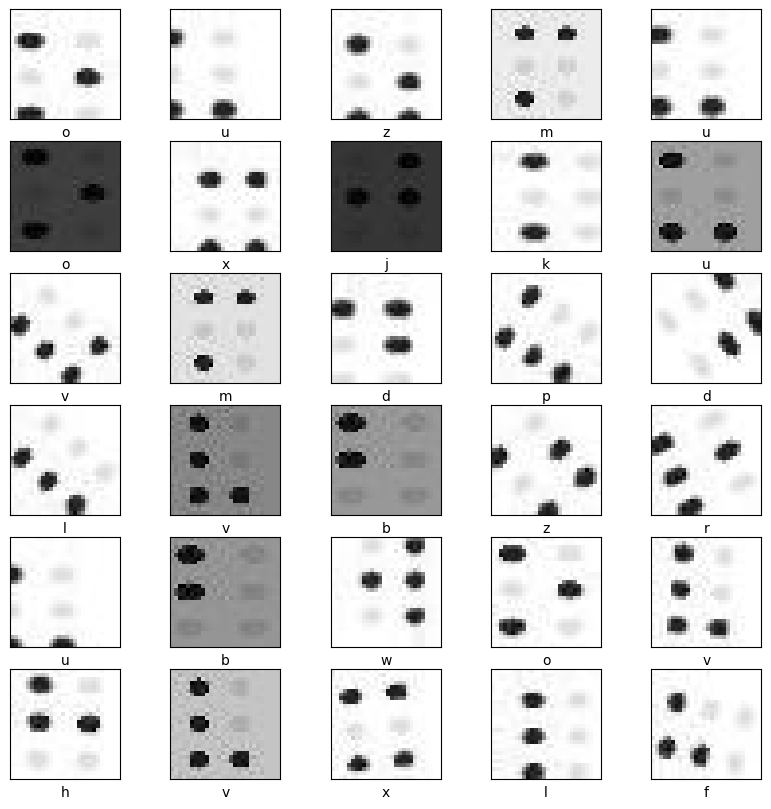

In [88]:
class_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 
               'h', 'i', 'j', 'k', 'l', 'm', 'n', 
               'o', 'p', 'q', 'r', 's', 't', 'u', 
               'v', 'w', 'x', 'y', 'z']

plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [89]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', strides=(1, 1), activation='relu', input_shape=(28,28,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', strides=(1,1), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2, input_shape=(28,1)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', strides=(1,1), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25, input_shape=(28,1)),
    keras.layers.BatchNormalization(),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(units=512, activation="relu"),
    keras.layers.Dropout(0.5, input_shape=(28,1)),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(units=288, activation="relu"),
    keras.layers.Dense(units=26, activation="softmax") 
])

c:\Users\ASUS\anaconda3\envs\img_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ASUS\anaconda3\envs\img_env\Lib\site-packages\keras\src\layers\regularization\dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [90]:
# checkpoint_path = "./braille.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)
# batch_size = 32

# # Cria um callback que salve os pesos do modelo em intervalos de 5 épocas
# save_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_path, 
#     verbose=1, 
#     save_weights_only=True,
#     save_freq=5*batch_size)

# Treinando o modelo

In [91]:
model.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

In [92]:
from keras.callbacks import EarlyStopping

In [93]:
es1 = EarlyStopping(patience=20, monitor="val_sparse_categorical_accuracy", mode="auto")
es2 = EarlyStopping(patience=20, monitor="val_loss", mode="auto")

In [94]:
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.3,
                    # callbacks=[es1, es2, save_callback]
                    )

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 3.4212 - sparse_categorical_accuracy: 0.0944 - val_loss: 3.4787 - val_sparse_categorical_accuracy: 0.0427
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 2.1537 - sparse_categorical_accuracy: 0.3765 - val_loss: 5.5466 - val_sparse_categorical_accuracy: 0.0427
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 1.3406 - sparse_categorical_accuracy: 0.6125 - val_loss: 7.7904 - val_sparse_categorical_accuracy: 0.0427
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 1.0275 - sparse_categorical_accuracy: 0.6826 - val_loss: 9.5896 - val_sparse_categorical_accuracy: 0.0427
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.8893 - sparse_categorical_accuracy: 0.7490 - val_loss: 10.4389 - val_sparse_categorical_accuracy: 0.0427
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.6584 - sparse_categorical_accuracy: 0.7967 - val_loss: 10.9239 - val_sparse_categorical_accuracy: 0.0427
Ep

In [95]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 288)            │       147,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 26)             │         7,514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,126,384 (19.56 MB)

 Trainable params: 1,708,154 (6.52 MB)

 Non-trainable params: 1,920 (7.50 KB)

 Optimizer params: 3,416,310 (13.03 MB)

In [96]:
time = np.arange(1, len(history.history['loss'])+1)

In [97]:
import seaborn as sns

# Resultados

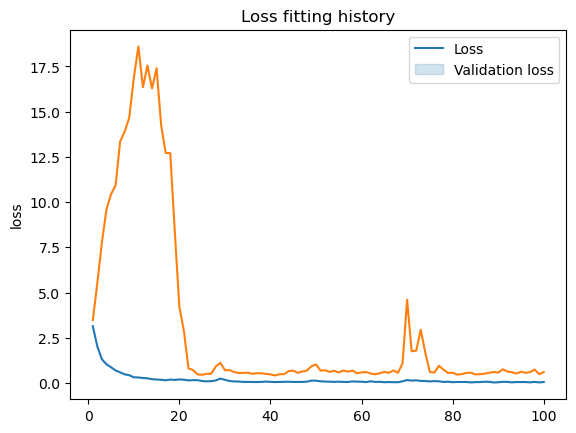

In [98]:
sns.lineplot(data=history.history, x=time, y='loss')
sns.lineplot(data=history.history, x=time, y='val_loss')
plt.title('Loss fitting history')
plt.legend(labels=['Loss', 'Validation loss'])
plt.show()

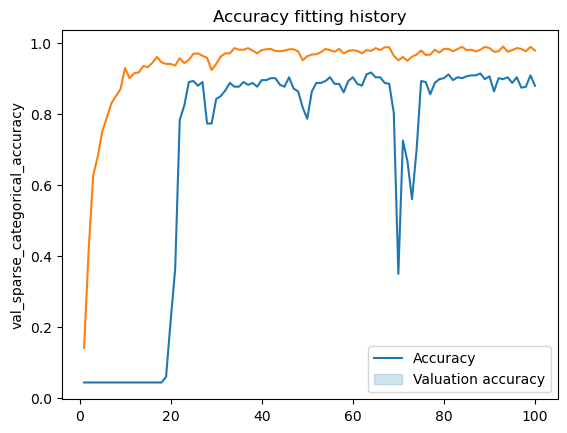

In [99]:
sns.lineplot(data=history.history, x=time, y='val_sparse_categorical_accuracy')
sns.lineplot(data=history.history, x=time, y='sparse_categorical_accuracy')
plt.title('Accuracy fitting history')
plt.legend(labels=['Accuracy', 'Valuation accuracy'])
plt.show()

In [100]:
test_loss, test_acc = model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4393 - sparse_categorical_accuracy: 0.9129


In [101]:
print('Loss', test_loss)
print('Accuracy', test_acc)

Loss 0.42573845386505127
Accuracy 0.9102563858032227


In [102]:
# Save the entire model to a file
model.save("model.h5")

index:  78
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
score:  [[2.65348673e-14 3.06127461e-08 1.71183651e-16 6.16110431e-16
  1.42172327e-19 3.25369905e-11 4.31216499e-17 6.75169469e-12
  1.30387298e-11 1.18016402e-15 5.59316260e-10 1.00000000e+00
  2.74277924e-16 6.61685295e-19 1.32346664e-15 1.59889058e-09
  8.01110527e-17 5.80360260e-10 2.36789227e-10 9.41008606e-17
  8.53478190e-15 1.30214515e-08 4.57238232e-16 3.24542859e-20
  6.29621125e-20 2.76802664e-16]]
Predicted label: l


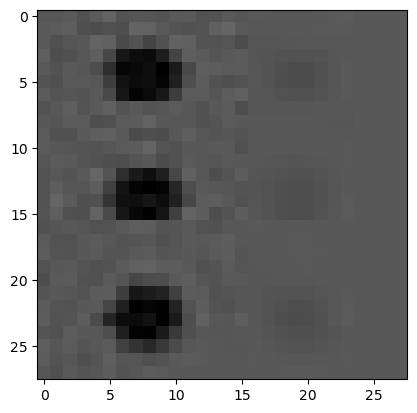

In [103]:
from random import randrange
print("index: ", randrange(312))
index_image = randrange(312)
prediction_scores = model.predict(np.expand_dims(X_test[index_image], axis=0))
predicted_index = np.argmax(prediction_scores)
plt.imshow(X_test[index_image])
print("score: ", prediction_scores)
print("Predicted label: " + class_names[predicted_index])